# Examples for Chapter 9

In [1]:
%matplotlib inline

In [ ]:
run scripts/subset -d [200,200,1000,1000] imagery/LT5_19980329.tif 

In [ ]:
run scripts/dispms -f imagery/LT5_19980329_sub.tif -e 4 -p [4,5,7] \
-F imagery/LT5_19980516_sub.tif -E 4 -P [4,5,7] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_1.eps'

## Naive methods

In [ ]:
import ee
import IPython.display as disp

ee.Initialize()

im1 = ee.Image('users/mortcanty/CRC4/Chapter9/LT5_19980329_sub')
im2 = ee.Image('users/mortcanty/CRC4/Chapter9/LT5_19980516_sub')
ndvi1 = im1.normalizedDifference(['b4', 'b3'])
ndvi2 = im2.normalizedDifference(['b4', 'b3'])
url = ndvi1.subtract(ndvi2) \
   .getThumbURL({'min':-0.3,'max':0.3})
disp.Image(url=url)

## Principal components

In [ ]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import matplotlib.pyplot as plt

gdal.AllRegister()
infile = 'imagery/LT5_19980329.tif'                 
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    
band = inDataset.GetRasterBand(4)  
G1 = band.ReadAsArray(0,0,cols,rows).flatten()
infile = 'imagery/LT5_19980516.tif'                 
inDataset = gdal.Open(infile,GA_ReadOnly)       
band = inDataset.GetRasterBand(4)  
G2 = band.ReadAsArray(0,0,cols,rows).flatten()
idx = np.random.randint(0,rows*cols,10000)
p = plt.plot(G1[idx],G2[idx],'.')
plt.savefig('/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_3.eps',bbox_inches='tight')

### Iterated PCA

In [ ]:
run scripts/ex9_1 imagery/LT5_19980329_sub.tif imagery/LT5_19980516_sub.tif

### Kernel PCA

In [ ]:
run scripts/dispms -f imagery/traffic1.jpg -p [1,2,3] -e 3 -F imagery/traffic2.jpg -P [1,2,3] -E 3 \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_6.eps'

In [ ]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly, GDT_Float32

gdal.AllRegister()
G = np.zeros((1000,1000,2))
inDataset = gdal.Open('imagery/traffic1.jpg',GA_ReadOnly)
G[:,:,0] = inDataset.GetRasterBand(1).ReadAsArray(0,0,1000,1000).astype(float)
inDataset = gdal.Open('imagery/traffic2.jpg',GA_ReadOnly)
G[:,:,1] = inDataset.GetRasterBand(1).ReadAsArray(0,0,1000,1000).astype(float)
driver = gdal.GetDriverByName('GTiff')
outDataset = driver.Create('imagery/traffic_bitemp.tif',1000,1000,2,GDT_Float32)
for k in range(2):        
    outBand = outDataset.GetRasterBand(k+1)
    outBand.WriteArray(G[:,:,k],0,0) 
    outBand.FlushCache() 
G[:,:,1] = G[:,:,1]**2  
outDataset = driver.Create('imagery/traffic_bitemp_nonlin.tif',1000,1000,2,GDT_Float32)
for k in range(2):        
    outBand = outDataset.GetRasterBand(k+1)
    outBand.WriteArray(G[:,:,k],0,0) 
    outBand.FlushCache() 
inDataset=None
outDataset=None

In [ ]:
run scripts/pca imagery/traffic_bitemp.tif

In [ ]:
run scripts/kpca  imagery/traffic_bitemp.tif 

In [ ]:
run scripts/dispms -f imagery/traffic_bitemp_pca.tif -e 2 -p [2,2,2] \
-F imagery/traffic_bitemp_kpca.tif -E 2 -P [2,2,2] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_7.eps'

In [ ]:
run scripts/pca imagery/traffic_bitemp_nonlin.tif

In [ ]:
run scripts/kpca imagery/traffic_bitemp_nonlin.tif 

In [ ]:
run scripts/dispms -f imagery/traffic_bitemp_nonlin_pca.tif -e 2 -p [2,2,2] \
-F imagery/traffic_bitemp_nonlin_kpca.tif -E 2 -P [5,5,5] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_8.eps'

## Multivariate Alteration Detection (MAD)

In [ ]:
# Run the iMAD transformation
%run scripts/iMad -i 50 imagery/LT5_19980329_sub.tif \
                         imagery/LT5_19980516_sub.tif
# Set a signifcance level and calculate change map
%run scripts/iMadmap \
imagery/MAD(LT5_19980329_sub-LT5_19980516_sub).tif 0.0001

In [ ]:
run scripts/dispms -f imagery/MAD(LT5_19980329_sub-LT5_19980516_sub)_cmap.tif -e 3 -p [1,1,1] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_9.eps'

In [ ]:
run scripts/dispms -f imagery/LE7_20010626 -e 3 -p [4,5,6] \
-F imagery/LE7_20010829 -E 3  -P [4,5,6] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_11.eps'

In [ ]:
%run scripts/iMad imagery/LE7_20010626 imagery/LE7_20010829
%run scripts/iMadmap imagery/MAD(LE7_20010626-LE7_20010829) 0.0001 

In [ ]:
run scripts/dispms -f imagery/MAD(LE7_20010626-LE7_20010829) -e 2 -p [1,1,1] \
-F imagery/MAD(LE7_20010626-LE7_20010829) -E 2 -P [3,3,3] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_13.eps'

In [ ]:
run scripts/dispms -f imagery/MAD(LE7_20010626-LE7_20010829)_cmap -e 3 -p [1,2,3] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_14.eps'

In [ ]:
run scripts/em -K 4  imagery/MAD(LE7_20010626-LE7_20010829)

In [ ]:
%run scripts/dispms -f imagery/MAD(LE7_20010626-LE7_20010829)_em -c -d [400,0,200,200] \
-F imagery/LE7_20010829 -E 1 -D [400,0,200,200] -P [4,4,4] \
-s '/home/mort/LaTeX/new projects/CRC4/Chapter9/fig9_15.eps'

## MAD on the Google Earth Engine

In [2]:
import ee, math, time
from ipyleaflet import (Map,DrawControl,TileLayer)
from auxil.eeMad import imad
ee.Initialize()

def handle_draw(self, action, geo_json):
    global poly
    if action == 'created':
        coords =  geo_json['geometry']['coordinates']
        poly = ee.Geometry.Polygon(coords)
        
dc = DrawControl()
dc.on_draw(handle_draw)

def GetTileLayerUrl(ee_image_object):
  map_id = ee.Image(ee_image_object).getMapId()
  tile_url_template = "https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}"
  return tile_url_template.format(**map_id)

### Draw the map

In [28]:
m = Map(center=[50.9, 6.4], zoom=11)
m.add_control(dc)

m

TWFwKGJhc2VtYXA9eyd1cmwnOiAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLCAnbWF4X3pvb20nOiAxOSwgJ2F0dHJpYnV0aW9uJzogJ01hcCDigKY=


### iMAD wrapper function

In [29]:
def iMad(cid,poly,sd1,ed1,sd2,ed2,bns,maxitr):
    collection = ee.ImageCollection(cid) \
         .filterBounds(poly) \
         .filterDate(ee.Date(sd1), ee.Date(ed1)) \
         .sort('system:time_start',False)
    image1 = ee.Image(collection.first()).select(bns)
    collection = ee.ImageCollection(collectionid) \
         .filterBounds(poly) \
         .filterDate(ee.Date(sd2), ee.Date(ed2)) \
         .sort('system:time_start',False)                   
    image2 = ee.Image(collection.first()).select(bns) 
    image2 = image2.register(image1,60)
    inputlist = ee.List.sequence(1,maxitr)
    first = ee.Dictionary({'done':ee.Number(0),
          'image':image1.addBands(image2).clip(poly),
          'allrhos': [ee.List.sequence(1,len(bns))],
          'chi2':ee.Image.constant(0),
          'MAD':ee.Image.constant(0)}) 
    madnames = ['MAD'+str(i+1) for i in range(len(bns))]
#  run the algorithm    
    result = ee.Dictionary(inputlist.iterate(imad,first))                
    MAD = ee.Image(result.get('MAD')).rename(madnames)
    return MAD

### Input data

In [30]:
collectionid = 'LANDSAT/LE07/C01/T1_RT_TOA'
bandNames = ['B1','B2','B3','B4','B5','B7']
startDate1 = '2001-06-25'
endDate1 = '2001-06-27'
startDate2 = '2001-08-28'
endDate2 = '2001-08-30'
maxitr = 50
MAD = iMad(collectionid,poly,startDate1,
           endDate1,startDate2,endDate2,
           bandNames,maxitr)

### Display on map

In [35]:
m.add_layer(
    TileLayer(url=GetTileLayerUrl(
        MAD.select('MAD1') \
        .visualize(min=-5, max=5)
    )
))

### Export to assets

In [ ]:
assexportname = 'users/mortcanty/imad/trail1'
assexport = ee.batch.Export.image.toAsset(MAD,
           description='assetExportTask', 
           assetId=assexportname,scale=30,maxPixels=1e9)
assexportid = str(assexport.id)
print '****Exporting to Assets, task id: %s'%assexportid
assexport.start() 

## Polarimetric SAR change detection

In [26]:
!scripts/run_sar_seq.sh S1A imagery/ 12 0.0001

     Multi-temporal SAR Change Detection
Thu Jun 21 13:23:17 2018
First (reference) filename:  imagery/S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367.tif
number of images: 8
equivalent number of looks: 12.000000
significance level: 0.000100
pre-calculating Rj and p-values ...
attempting parallel calculation ...
available engines [0, 1, 2, 3]
ell =  1 2 3 4 5 6 7 
elapsed time for p-value calculation: 15.2334320545
most recent change map written to: /home/mort/python/CRC4Docker/src/imagery/sarseq_cmap.tif
frequency map written to: /home/mort/python/CRC4Docker/src/imagery/sarseq_fmap.tif
bitemporal map image written to: /home/mort/python/CRC4Docker/src/imagery/sarseq_bmap.tif
first change map written to: /home/mort/python/CRC4Docker/src/imagery/sarseq_smap.tif
total elapsed time: 15.3809919357


In [10]:
run scripts/gamma_filter imagery/S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367.tif 12

    GAMMA MAP FILTER
Thu Jun 21 13:15:30 2018
infile:  imagery/S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367.tif
equivalent number of looks: 12.000000
Attempting parallel computation ...
available engines: [0, 1, 2, 3]
filtering 2 diagonal matrix element bands ...
result written to: imagery/S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367_gamma.tif
elapsed time: 155.444088936


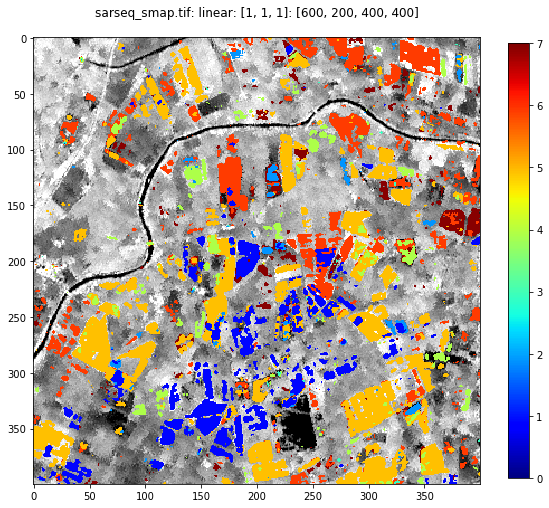

In [31]:
 run scripts/dispms -f  imagery/sarseq_smap.tif -c -d [600,200,400,400] \
  -F imagery/S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367_gamma.tif -D [600,200,400,400] -o 1 

In [5]:
!scripts/run_sar_seq.sh RS2 myimagery/ 12 0.0001

     Multi-temporal SAR Change Detection
Thu Jun 21 12:40:31 2018
First (reference) filename:  myimagery/RS2_20090525.tif
number of images: 12
equivalent number of looks: 12.000000
significance level: 0.000100
pre-calculating Rj and p-values ...
attempting parallel calculation ...
available engines [0, 1, 2, 3]
ell =  1 2 3 4 5 6 7 8 9 10 11 
elapsed time for p-value calculation: 55.6908369064
most recent change map written to: /home/mort/python/CRC4Docker/src/myimagery/sarseq_cmap.tif
frequency map written to: /home/mort/python/CRC4Docker/src/myimagery/sarseq_fmap.tif
bitemporal map image written to: /home/mort/python/CRC4Docker/src/myimagery/sarseq_bmap.tif
first change map written to: /home/mort/python/CRC4Docker/src/myimagery/sarseq_smap.tif
total elapsed time: 55.955509901


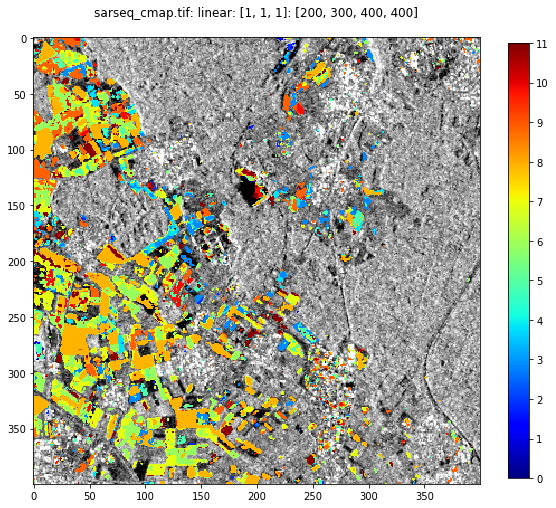

In [6]:
run scripts/dispms -f myimagery/sarseq_cmap.tif -c -d [200,300,400,400] \
-F myimagery/RS2_20090525.tif  -D [200,300,400,400]  -o 1

## Sequential SAR change detection on the GEE

In [6]:
from auxil import eesar_seq
eesar_seq.run()

TWFwKGJhc2VtYXA9eyd1cmwnOiAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLCAnbWF4X3pvb20nOiAxOSwgJ2F0dHJpYnV0aW9uJzogJ01hcCDigKY=


VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oVGV4dCh2YWx1ZT11JzIwMTgtMDEtMDEnLCBkZXNjcmlwdGlvbj11J1N0YXJ0IGRhdGU6JywgcGxhY2Vob2xkZXI9dScgJyksIFRleHQodmHigKY=
